# Assignment - 7- B
## Image similarity estimation using a Siamese Network with a triplet loss

## Introduction

A [Siamese Network](https://en.wikipedia.org/wiki/Siamese_neural_network) is a type of network architecture that
contains two or more identical subnetworks used to generate feature vectors for each input and compare them.

Siamese Networks can be applied to different use cases, like detecting duplicates, finding anomalies, and face recognition.

This example uses a Siamese Network with three identical subnetworks. We will provide three images to the model, where
two of them will be similar (_anchor_ and _positive_ samples), and the third will be unrelated (a _negative_ example.)
Our goal is for the model to learn to estimate the similarity between images.

For the network to learn, we use a triplet loss function. You can find an introduction to triplet loss in the
[FaceNet paper](https://arxiv.org/pdf/1503.03832.pdf) by Schroff et al,. 2015. In this example, we define the triplet
loss function as follows:

`L(A, P, N) = max(‖f(A) - f(P)‖² - ‖f(A) - f(N)‖² + margin, 0)`

## Tasks
1. Fetch the data using the following code and create tripets using the helper code. Visualize few random triplets
2. Write a code to preprocess the images. Standard preprocessing includes decoding the image, convert the dtype to float and resizing the image. Use tensorflow functions to do so and store your data in tensorflow variables rather than numpy or python lists as it is much faster.
3. Shuffle the dataset, Split into train and validation. (80-20)
4. Use a pretrained ResNet50 to obtain embeddings for images (freeze the weights). Add few Dense and Batch Norm layers at the end.  Implement triplet loss and train the model. Keep a track of val loss.
5. Now unfreeze last few layers of ResNet50 and rerun the experiment. Compare the val loss of this model with val loss of previous model(with parameters freezed).
6. Use cosine cosine similarity metric to measure how to 2 output embeddings are similar to each other. Is similiarty of  (Anchor , Positive ) > (Anchor , Negative)


## Note -

Change the runtime type to T4 GPU on your colab. Without GPU, the model takes much longer.

## Dataset
* Original Dataset - https://vis-www.cs.umass.edu/lfw/
* Fewer examples from this dataset suitable for our task is selected and is hosted in the following link.

In [ ]:
!gdown 1ykjp7xHOE2TSTjcDzm6NlJRP2n_JSaBW

Downloading...
From: https://drive.google.com/uc?id=1ykjp7xHOE2TSTjcDzm6NlJRP2n_JSaBW
To: /content/LFW_Trimmed_zip.zip
100% 9.45M/9.45M [00:00<00:00, 26.4MB/s]


In [ ]:
!unzip /content/LFW_Trimmed_zip.zip

In [ ]:
image_dir = "/content/LFW_Trimmed"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from pathlib import Path
import pandas as pd

(250, 250, 3, 3)


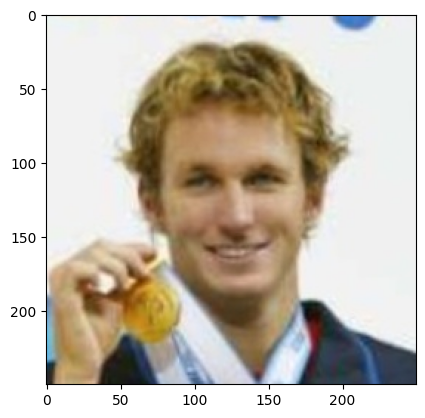

In [ ]:
filename = image_dir+"/Aaron_Peirsol/Aaron_Peirsol_0001.jpg"
pixels = plt.imread(filename)

# Show RGB shape
rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)

# Show example image
plt.imshow(pixels)
plt.show()

(250, 250, 3, 3)


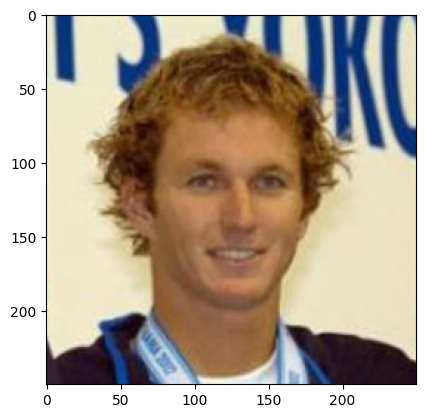

In [ ]:
filename = image_dir+"/Aaron_Peirsol/Aaron_Peirsol_0002.jpg"
pixels = plt.imread(filename)

# Show RGB shape
rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)

# Show example image
plt.imshow(pixels)
plt.show()

In [ ]:
subjects= os.listdir(image_dir)   # list of all people
image_paths = []
for subject in subjects:
    subject_path = os.path.join(image_dir, subject)
    for filename in os.listdir(subject_path):
        full_path = os.path.join(subject_path, filename)
        image_paths.append(full_path)    # storing path for each and every image in image paths


#photos_list_flatten = [item for sublist in photos_list for item in sublist]
print(len(subjects))
print(subjects[:5])
print(image_paths[:2])

100
['Alan_Greenspan', 'James_Kopp', 'Martha_Stewart', 'Ben_Affleck', 'Geoff_Hoon']
['/content/LFW_Trimmed/Alan_Greenspan/Alan_Greenspan_0005.jpg', '/content/LFW_Trimmed/Alan_Greenspan/Alan_Greenspan_0001.jpg']


In [ ]:
from itertools import combinations  # imported to create combinations

In [ ]:
def create_triplets(subjects, photos_list):    # two images of same person and one image of another person
  anchor_positive=[]
  negative=[]
  for subject in subjects:
    subject_photos= [i for i in photos_list if subject in i]
    non_subjectphotos= [i for i in photos_list if subject not in i]
    anchor_positiveset= list(combinations(subject_photos, 2))
    anchor_positive.extend(anchor_positiveset)
    negative.extend(random.choices(non_subjectphotos, k=len(anchor_positiveset)))
  data_df=pd.DataFrame(anchor_positive,columns=['anchor','positive'])
  data_df['negative']=negative
  return data_df


In [ ]:
data_df=create_triplets(subjects,image_paths)  # each column represents anchor, postive and negative image
print(data_df.shape)

(1003, 3)
